In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.colors as mcolors
from shapely.geometry import point,polygon
%matplotlib inline


In [2]:
df1=pd.read_csv('Coronavirus_Tunisia_Updated.csv')


In [3]:
df1.head(8)

,case,confirmation_date,age,gender,city,symptomatic,return_from,country
0,89,2020-03-22,46.0,Masculin,Mednine,2020-03-14,Local,Tunisia
1,88,2020-03-22,63.0,Féminin,Mednine,2020-03-14,Local,Tunisia
2,87,2020-03-22,40.0,Masculin,Tunis,2020-03-19,Local,Tunisia
3,86,2020-03-22,57.0,Féminin,Ariana,2020-03-21,Local,Tunisia
4,85,2020-03-22,61.0,Masculin,Manouba,2020-03-16,France,Tunisia
5,84,2020-03-22,NaN,Féminin,Tunis,2020-03-14,Local,Tunisia
6,83,2020-03-22,69.0,Féminin,Tunis,2020-03-20,France,Tunisia
7,82,2020-03-22,61.0,Féminin,Tunis,2020-03-16,Espagne,Tunisia


In [4]:
df1.columns

Index(['case', 'confirmation_date', 'age', 'gender', 'city', 'symptomatic',
       'return_from', 'country'],
      dtype='object')

In [5]:
df1.dtypes

case                   int64
confirmation_date     object
age                  float64
gender                object
city                  object
symptomatic           object
return_from           object
country               object
dtype: object

In [6]:
df1['confirmation_date']=pd.to_datetime (df1['confirmation_date'] , format='%Y-%m-%d')

In [7]:
df1['city'].value_counts()


city
Tunis        28
Ariana       17
Ben Arous     8
Mednine       5
Monastir      5
Tataouine     5
Sousse        5
Sfax          4
Mahdia        3
Kairouan      2
Bizerte       2
Manouba       1
Kebili        1
Gabes         1
Nabeul        1
Gafsa         1
Name: count, dtype: int64

In [8]:
df1['return_from'].value_counts()

return_from
France        35
Local         29
Turquie        6
Espagne        5
Italie         4
Egypte         4
Angleterre     3
Etats Unis     1
Vietnam        1
Allemagne      1
Name: count, dtype: int64

In [9]:
df2=pd.read_csv('Tunisia_daily_number_of_cases.csv')

In [10]:
df2['dateRep']=pd.to_datetime(df2['dateRep'], format='%d/%m/%Y')

In [11]:
array1=[]
array2=[]

for i in range(len(df1['city'])):
    if df1['city'].iloc[i] not in array1:
        array1.append(df1['city'].iloc[i])
       
array1 =np.array(array1)
array2 = df1['city'].value_counts()

df3 = pd.DataFrame({'City': array2.index, 'Count': array2.values})




Visualising the data 

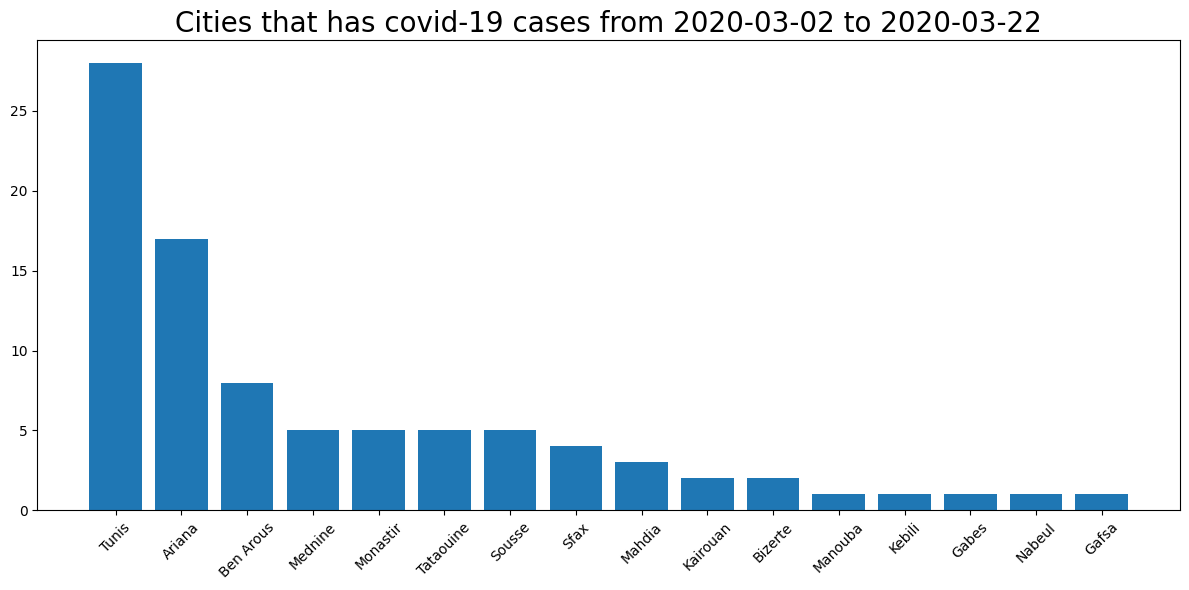

In [12]:
#Cities that has covid-19 cases
fig2=plt.figure(figsize=(12,6))
plt.title('Cities that has covid-19 cases from 2020-03-02 to 2020-03-22', size =20  )
plt.bar(df3['City'],df3['Count'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



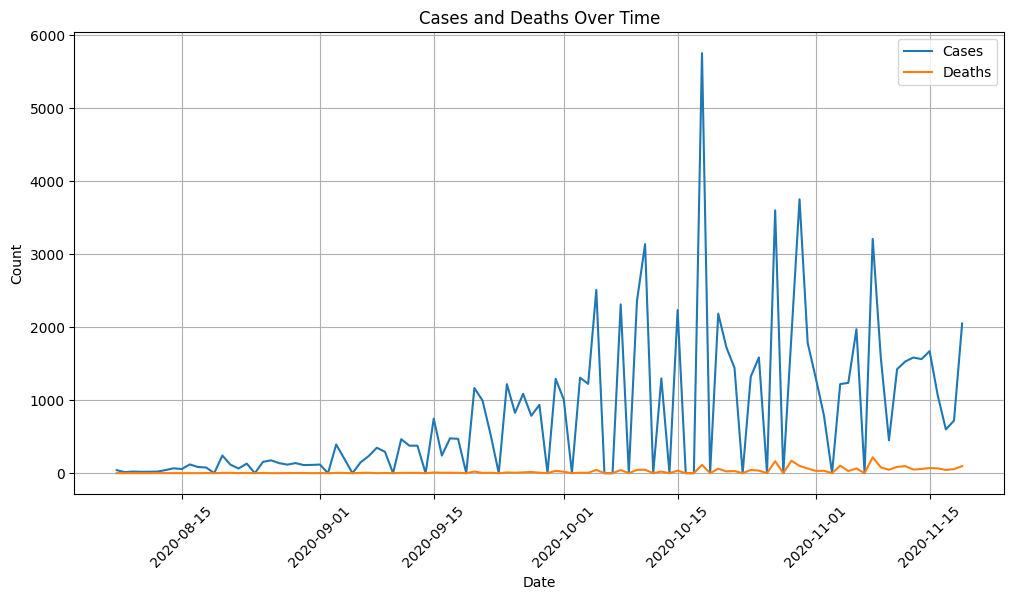

In [13]:
#grouth trend 

start_date = '2020-08-07'
end_date = '2020-12-30'

filtredDF=df2[(df2['dateRep'] >= start_date) & (df2['dateRep'] <= end_date)]


fig2 =plt.figure(figsize=(12,6))

sns.lineplot(x='dateRep', y='cases', data=filtredDF, label='Cases')
sns.lineplot(x='dateRep', y='deaths', data=filtredDF, label='Deaths')
plt.title('cases/deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Cases and Deaths Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df3=pd.read_csv('Hospital_beds.csv')
df3

,city,beds
0,Bizerte,8
1,Ariana,32
2,La manouba,7
3,Tunis,108
4,Ben arous,37
5,Nabeul,12
6,Zaghouan,6
7,Sousse,46
8,Monastir,31
9,Mahdia,14


In [15]:
df3['city'] = df3['city'].replace('La manouba', 'Manouba')


<Axes: >

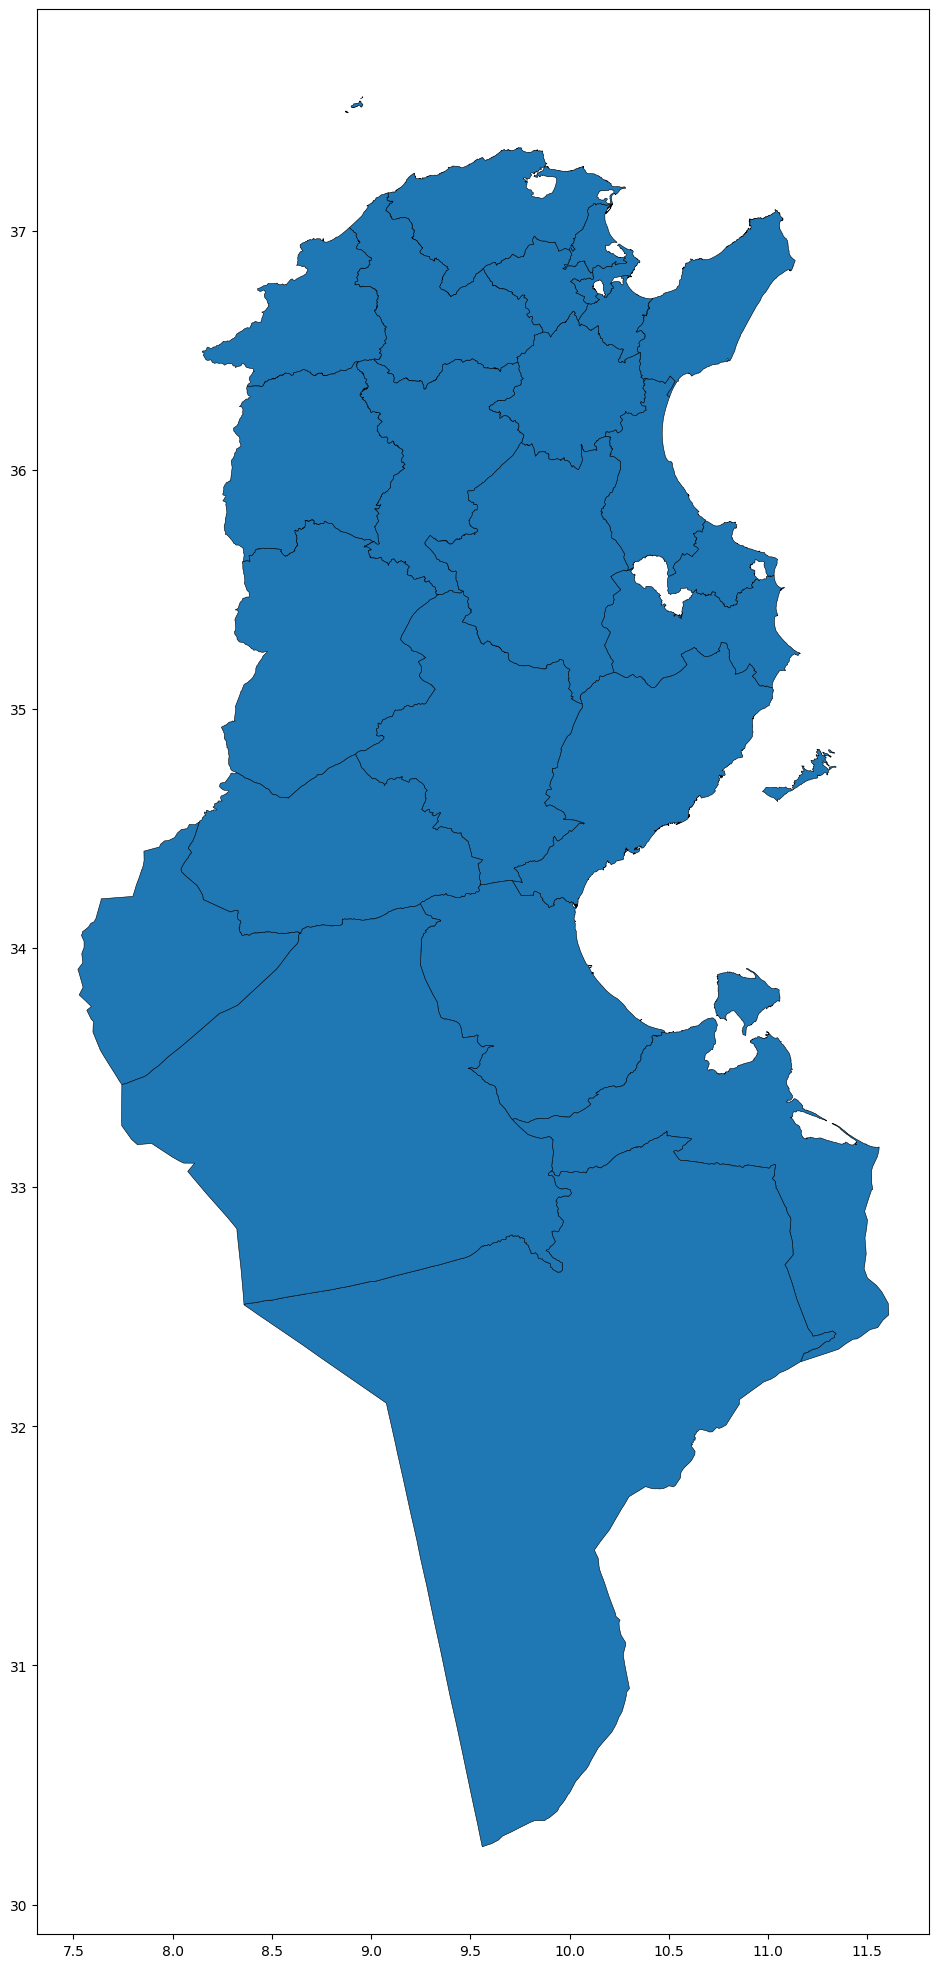

In [16]:
cities=gpd.read_file('TUN ADM/tun_admbnda_adm2_ins_20221115.shp')
cities.plot(figsize=(25,25), edgecolor='black', linewidth = 0.4)


In [17]:
todrop=['validOn','date','ADM2_PCODE','ADM2_REF','ADM2ALT1AR','ADM2ALT2AR','ADM2ALT1EN','ADM2ALT2EN','ADM1_PCODE']
cities=cities.drop(columns=todrop)

In [18]:
cities['ADM2_EN'] = cities['ADM2_EN'].replace('Manubah', 'Manouba')


In [19]:
cities = cities.merge(df3, left_on='ADM2_EN',right_on='city', how='left')

In [20]:
Cases = df1['city'].value_counts()
cities = cities.merge(Cases, left_on='city', right_index=True, how='left')


In [21]:
cities.rename(columns={'count': 'cases'},inplace=True)

In [22]:
cities

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_AR,ADM1_EN,ADM1_AR,ADM0_EN,ADM0_AR,ADM0_PCODE,validTo,geometry,city,beds,cases
0,1.609485,0.026511,Tunis,تونس,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.29404 36.81224, 10.29385 36.81228...",Tunis,108.0,28.0
1,1.665691,0.042112,Ariana,أريانة,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.21642 37.11139, 10.21638 37.11128...",Ariana,32.0,17.0
2,1.717957,0.066610,Ben Arous,بن عروس,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.29404 36.81224, 10.29285 36.81081...",NaN,NaN,NaN
3,2.261815,0.115345,Manouba,منوبة,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.00005 36.91816, 10.00053 36.91749...",Manouba,7.0,1.0
4,3.307740,0.284068,Nabeul,نابل,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.50427 36.30571, 10.50290 36.30583...",Nabeul,12.0,1.0
5,3.240378,0.284791,Zaghouan,زغوان,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"POLYGON ((10.04308 36.62286, 10.04317 36.62259...",Zaghouan,6.0,NaN
6,5.343521,0.366181,Bizerte,بنزرت,North East,الشمال الشرقي,Tunisia,تونس,TN,NaN,"MULTIPOLYGON (((9.74508 37.34723, 9.74509 37.3...",Bizerte,8.0,2.0
7,4.386774,0.368195,Béja,باجة,North West,الشمال الغربي,Tunisia,تونس,TN,NaN,"POLYGON ((9.56582 36.84114, 9.56893 36.83478, ...",NaN,NaN,NaN
8,3.647018,0.313341,Jendouba,جندوبة,North West,الشمال الغربي,Tunisia,تونس,TN,NaN,"POLYGON ((9.01619 36.46341, 9.00545 36.46060, ...",NaN,NaN,NaN
9,4.181141,0.510845,Le Kef,الكاف,North West,الشمال الغربي,Tunisia,تونس,TN,NaN,"POLYGON ((8.93563 36.45224, 8.93532 36.45197, ...",NaN,NaN,NaN


In [23]:
cmap = plt.get_cmap('Reds')
norm = mcolors.LogNorm(vmin=cities['cases'].min(), vmax=cities['cases'].max())

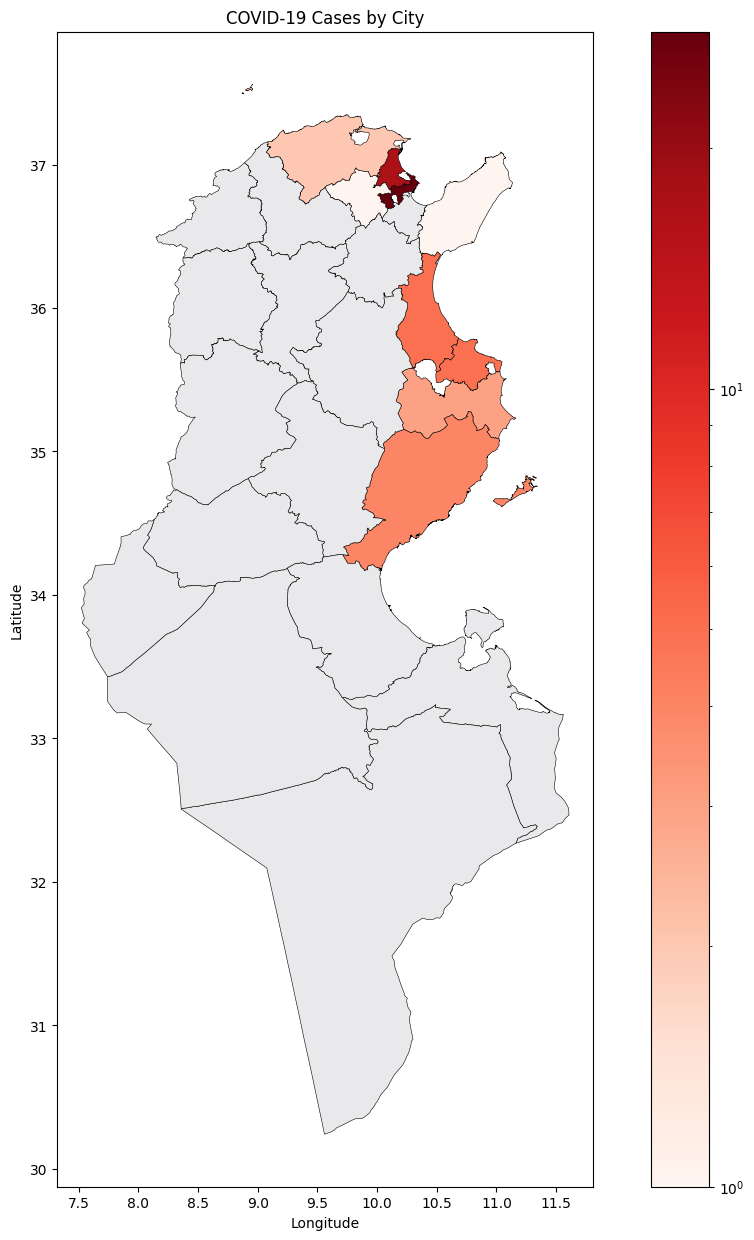

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


cities.plot(column='cases', cmap=cmap, norm=norm, legend=True, ax=ax,missing_kwds={'color': '#e9e8ea'},edgecolor='black', linewidth = 0.4)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('COVID-19 Cases by City')

# Display the map
plt.show()


In [28]:
cmap = plt.get_cmap('Greens')
norm = mcolors.LogNorm(vmin=cities['beds'].min(), vmax=cities['beds'].max())

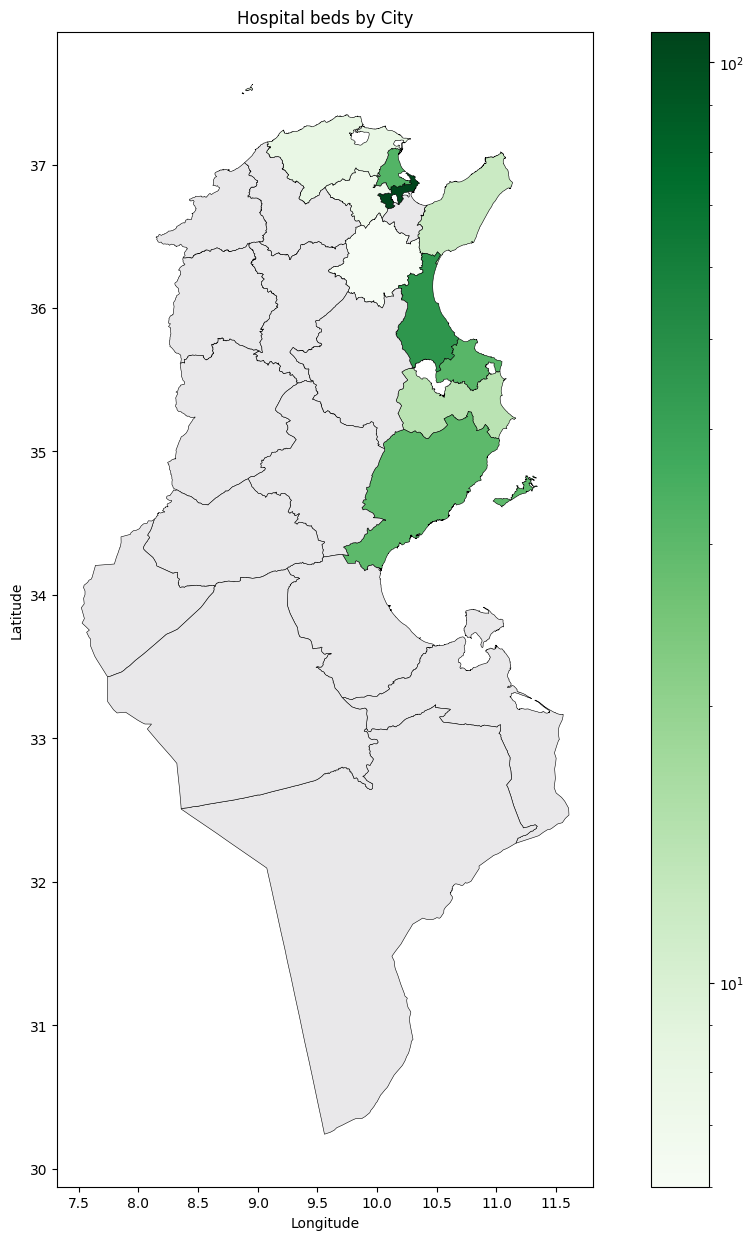

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


cities.plot(column='beds', cmap=cmap, norm=norm, legend=True, ax=ax,missing_kwds={'color': '#e9e8ea'},edgecolor='black', linewidth = 0.4)


ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hospital beds by City')


plt.show()
